In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
print('Python: {}'.format(sys.version))
from pandas.tools.plotting import scatter_matrix
import warnings
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Python: 3.7.1 (v3.7.1:260ec2c36a, Oct 20 2018, 14:05:16) [MSC v.1915 32 bit (Intel)]


In [6]:
iris_data=pd.read_csv('iris.data')

In [7]:
iris_data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
5,4.6,3.4,1.4,0.3,Iris-setosa
6,5.0,3.4,1.5,0.2,Iris-setosa
7,4.4,2.9,1.4,0.2,Iris-setosa
8,4.9,3.1,1.5,0.1,Iris-setosa
9,5.4,3.7,1.5,0.2,Iris-setosa


In [8]:
print(type(iris_data))

<class 'pandas.core.frame.DataFrame'>


In [9]:
iris_data.shape

(149, 5)

In [10]:
iris_data.ndim

2

In [11]:
iris_data.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [12]:
iris_data.tail()

,5.1,3.5,1.4,0.2,Iris-setosa
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica
148,5.9,3.0,5.1,1.8,Iris-virginica


In [13]:
iris_data.dtypes

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

In [14]:
iris_data['5.1'].describe()

count    149.000000
mean       5.848322
std        0.828594
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: 5.1, dtype: float64

In [15]:
pd.read_table('iris.names')

,1. Title: Iris Plants Database
NaN,Updated Sept 21 by C.Blake - Added discrepency...
2. Sources:,NaN
(a) Creator: R.A. Fisher,NaN
(b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov),NaN
"(c) Date: July, 1988",NaN
3. Past Usage:,NaN
- Publications: too many to mention!!! Here are a few.,NaN
"1. Fisher,R.A. ""The use of multiple measurements in taxonomic problems""",NaN
"Annual Eugenics, 7, Part II, 179-188 (1936); also in ""Contributions",NaN
"to Mathematical Statistics"" (John Wiley, NY, 1950).",NaN


In [16]:
iris_data.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [17]:
iris_data.columns = ['sepal_length','sepal_width','petal_length','petal_width','species']

In [18]:
new_row = pd.DataFrame({'sepal_length': 5.1, 'sepal_width': 3.5, 'petal_length': 1.4, 'petal_width': 0.2, 'species': 'Iris-setosa'},index= [0])

In [19]:
iris_data = pd.concat([new_row, iris_data]).reset_index(drop=True)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
iris_data.count

<bound method DataFrame.count of      sepal_length  sepal_width  petal_length  petal_width         species
0             5.1          3.5           1.4          0.2     Iris-setosa
1             4.9          3.0           1.4          0.2     Iris-setosa
2             4.7          3.2           1.3          0.2     Iris-setosa
3             4.6          3.1           1.5          0.2     Iris-setosa
4             5.0          3.6           1.4          0.2     Iris-setosa
5             5.4          3.9           1.7          0.4     Iris-setosa
6             4.6          3.4           1.4          0.3     Iris-setosa
7             5.0          3.4           1.5          0.2     Iris-setosa
8             4.4          2.9           1.4          0.2     Iris-setosa
9             4.9          3.1           1.5          0.1     Iris-setosa
10            5.4          3.7           1.5          0.2     Iris-setosa
11            4.8          3.4           1.6          0.2     Iris-setosa
12   

In [21]:
plt.style.use('ggplot')

In [22]:
iris_data['species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [23]:
print(iris_data.groupby('species').size())

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64


In [24]:
setosa = iris_data[iris_data['species']=='Iris-setosa']
versicolor = iris_data[iris_data['species']=='Iris-versicolor']
verginica = iris_data[iris_data['species']=='Iris-virginica']

print(setosa.describe())
print(versicolor.describe())
print(verginica.describe())


       sepal_length  sepal_width  petal_length  petal_width
count      50.00000    50.000000     50.000000     50.00000
mean        5.00600     3.418000      1.464000      0.24400
std         0.35249     0.381024      0.173511      0.10721
min         4.30000     2.300000      1.000000      0.10000
25%         4.80000     3.125000      1.400000      0.20000
50%         5.00000     3.400000      1.500000      0.20000
75%         5.20000     3.675000      1.575000      0.30000
max         5.80000     4.400000      1.900000      0.60000
       sepal_length  sepal_width  petal_length  petal_width
count     50.000000    50.000000     50.000000    50.000000
mean       5.936000     2.770000      4.260000     1.326000
std        0.516171     0.313798      0.469911     0.197753
min        4.900000     2.000000      3.000000     1.000000
25%        5.600000     2.525000      4.000000     1.200000
50%        5.900000     2.800000      4.350000     1.300000
75%        6.300000     3.000000      4.

In [25]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

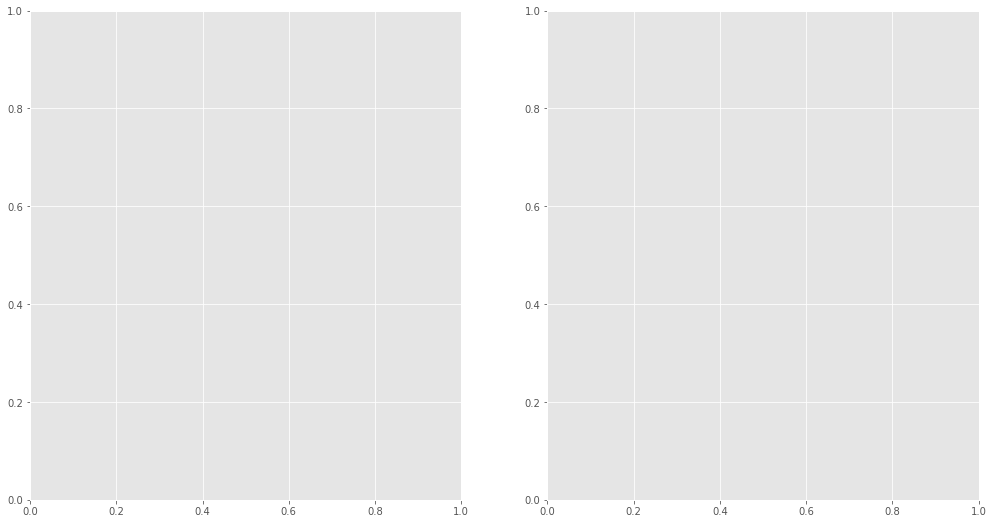

In [26]:
fig, ax = plt.subplots(1,2,figsize=(17,9))

<Figure size 432x288 with 0 Axes>

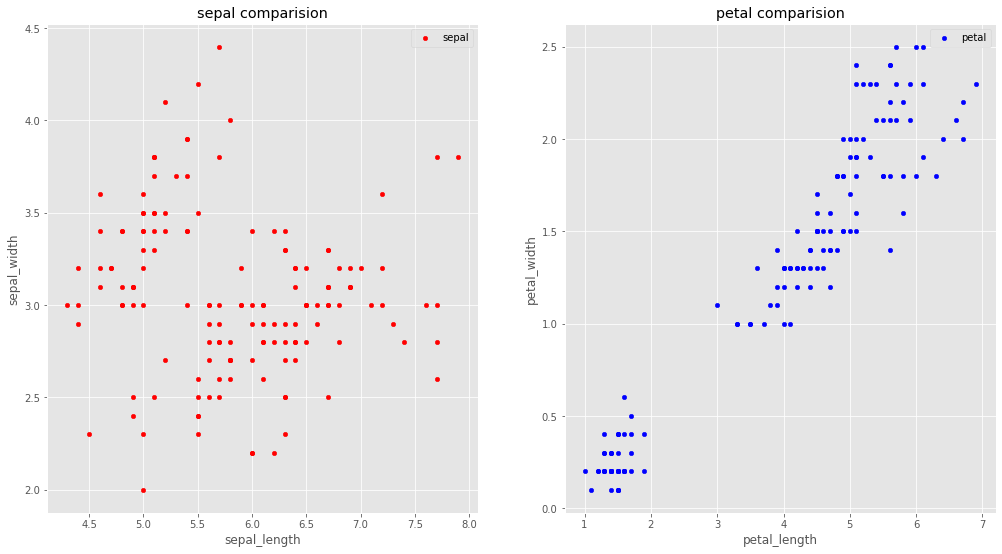

In [27]:
plt.figure()
fig, ax = plt.subplots(1,2,figsize=(17,9))
iris_data.plot(x='sepal_length', y='sepal_width',kind='scatter',ax=ax[0],sharex=False, sharey=False,label='sepal',color='r')
iris_data.plot(x='petal_length', y='petal_width',kind='scatter',ax=ax[1],sharex=False, sharey=False,label='petal',color='b')
ax[0].set(title='sepal comparision', ylabel='sepal_width')
ax[1].set(title='petal comparision', ylabel='petal_width')
ax[0].legend()
ax[1].legend()
plt.show()
plt.close()


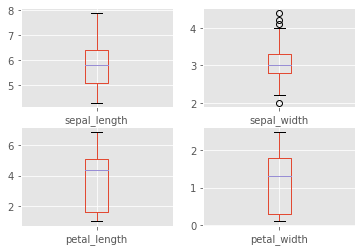

In [28]:
iris_data.plot(kind='box', subplots=True, layout=(2,2), sharex=False,sharey=False)
plt.show()

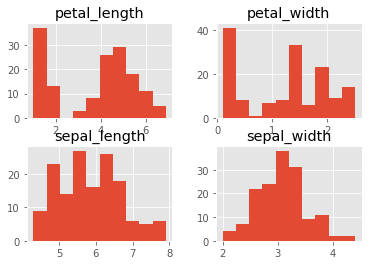

In [29]:
iris_data.hist()
plt.show()

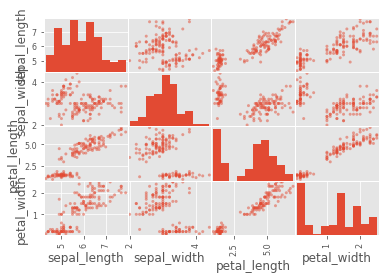

In [30]:
scatter_matrix(iris_data)
plt.show()

In [31]:
array = iris_data.values
X = array[:,0:4]
Y = array[:,4]
X_train,X_validation,Y_train,Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [40]:
regressor = LogisticRegression()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_validation)
print(X_validation)
print(y_pred)

[[5.8 4.0 1.2 0.2]
 [5.1 2.5 3.0 1.1]
 [6.6 3.0 4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2.0]
 [6.3 3.3 4.7 1.6]
 [6.9 3.1 5.1 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [5.6 2.7 4.2 1.3]
 [5.4 3.9 1.7 0.4]
 [7.1 3.0 5.9 2.1]
 [6.4 3.2 4.5 1.5]
 [6.0 2.9 4.5 1.5]
 [4.4 3.2 1.3 0.2]
 [5.8 2.6 4.0 1.2]
 [5.6 3.0 4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [5.0 3.2 1.2 0.2]
 [5.5 2.6 4.4 1.2]
 [5.4 3.0 4.5 1.5]
 [6.7 3.0 5.0 1.7]
 [5.0 3.5 1.3 0.3]
 [7.2 3.2 6.0 1.8]
 [5.7 2.8 4.1 1.3]
 [5.5 4.2 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [6.1 2.8 4.7 1.2]
 [6.3 2.5 5.0 1.9]]
['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 

c:\users\abusa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\abusa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [39]:
regressor = SVC()
regressor.fit(X_train, Y_train)
y_pred = regressor.predict(X_validation)
print(X_validation)
print(y_pred)

[[5.8 4.0 1.2 0.2]
 [5.1 2.5 3.0 1.1]
 [6.6 3.0 4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2.0]
 [6.3 3.3 4.7 1.6]
 [6.9 3.1 5.1 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [5.6 2.7 4.2 1.3]
 [5.4 3.9 1.7 0.4]
 [7.1 3.0 5.9 2.1]
 [6.4 3.2 4.5 1.5]
 [6.0 2.9 4.5 1.5]
 [4.4 3.2 1.3 0.2]
 [5.8 2.6 4.0 1.2]
 [5.6 3.0 4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [5.0 3.2 1.2 0.2]
 [5.5 2.6 4.4 1.2]
 [5.4 3.0 4.5 1.5]
 [6.7 3.0 5.0 1.7]
 [5.0 3.5 1.3 0.3]
 [7.2 3.2 6.0 1.8]
 [5.7 2.8 4.1 1.3]
 [5.5 4.2 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [6.1 2.8 4.7 1.2]
 [6.3 2.5 5.0 1.9]]
['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicol

c:\users\abusa\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [80]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDR', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTC', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

results = []
names = []

for name, model in models:
    kfold= StratifiedKFold(n_splits=10, random_state=1)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.960897 (0.052113)
LDR: 0.973974 (0.040110)
KNN: 0.957191 (0.043263)
DTC: 0.938100 (0.073158)
NB: 0.948858 (0.056322)
SVM: 0.983974 (0.032083)


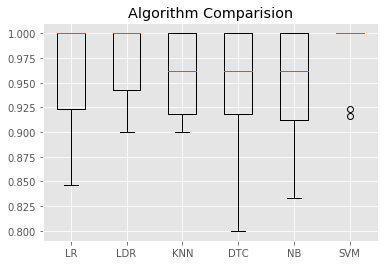

In [81]:
plt.boxplot(results, labels= names)
plt.title('Algorithm Comparision')
plt.show()

In [83]:
model = SVC(gamma='auto')
model.fit(X_train, Y_train)
prediction = model.predict(X_validation)

In [84]:
print(accuracy_score(Y_validation, prediction))
print(confusion_matrix(Y_validation, prediction))
print(classification_report(Y_validation, prediction))

0.9666666666666667
[[11  0  0]
 [ 0 12  1]
 [ 0  0  6]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

